<a href="https://colab.research.google.com/github/yuvakrishnayk/leo/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data=pd.read_csv('/content/Groceries_Sales_data.csv')
data.tail()

,Date,Sales
751,2020/02/22,18723.1
752,2020/02/23,4274.9
753,2020/02/24,45805.7
754,2020/02/25,35566.3
755,2020/02/26,46703.0


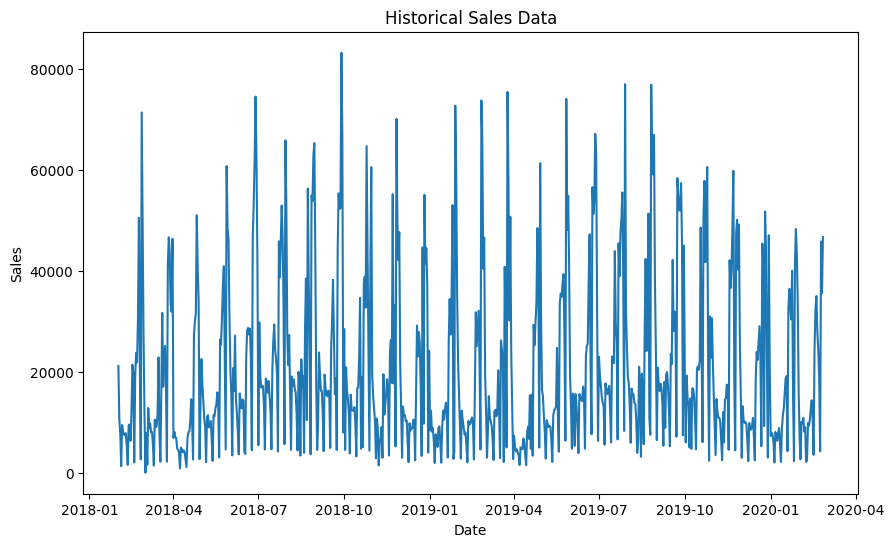

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/Groceries_Sales_data.csv', parse_dates=['Date'], index_col='Date')

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'])
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:

from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(data['Sales'], order=(5, 1, 0))  # (p, d, q) parameters

# Fit the model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  756
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8300.085
Date:                Sun, 26 May 2024   AIC                          16612.169
Time:                        16:45:34   BIC                          16639.930
Sample:                             0   HQIC                         16622.863
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4297      0.029    -14.997      0.000      -0.486      -0.374
ar.L2         -0.3448      0.032    -10.809      0.000      -0.407      -0.282
ar.L3         -0.1379      0.040     -3.440      0.0

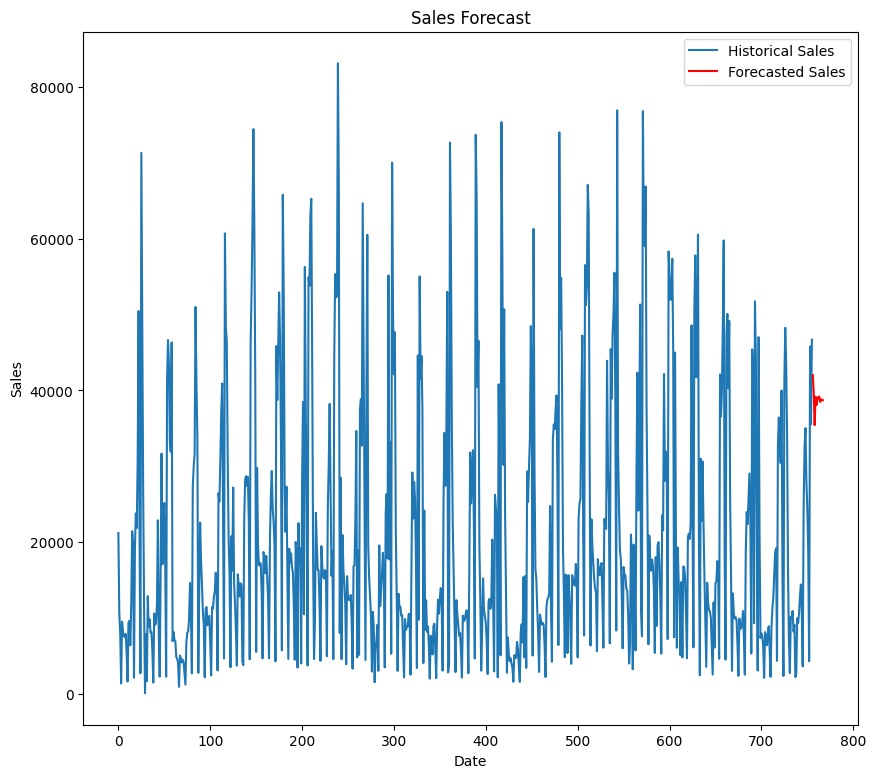

In [ ]:

# Forecast sales for the next 12 periods (e.g., months)
forecast = model_fit.forecast(steps=12)

# Plot the forecasted values
plt.figure(figsize=(10, 9))
plt.plot(data['Sales'], label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:

from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data['Sales'][:train_size], data['Sales'][train_size:]

# Fit the model on training data
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')

RMSE: 35904.70269505215


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [8]:
data=pd.read_csv('/content/demandsales.csv')
data.head()

,date,cust_id,Item_id,itemsales_quantity,total_price
0,2023-07-01,C1001,IT001,25,2000
1,2023-07-02,C1002,IT002,30,2500
2,2023-07-03,C1003,IT003,10,3590
3,2023-07-04,C1004,IT004,15,3900
4,2023-07-05,C1005,IT005,22,4000


In [9]:
data=data.dropna()

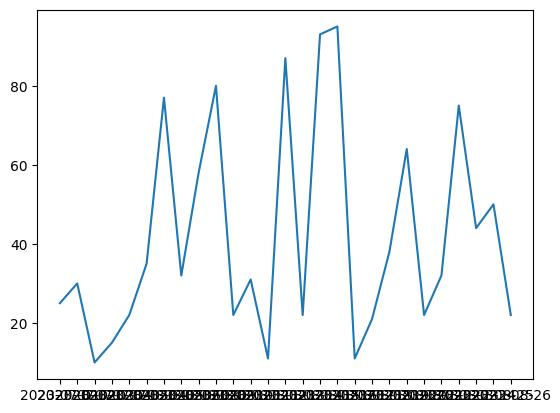

In [10]:
plt.plot(data['date'],data['itemsales_quantity'])

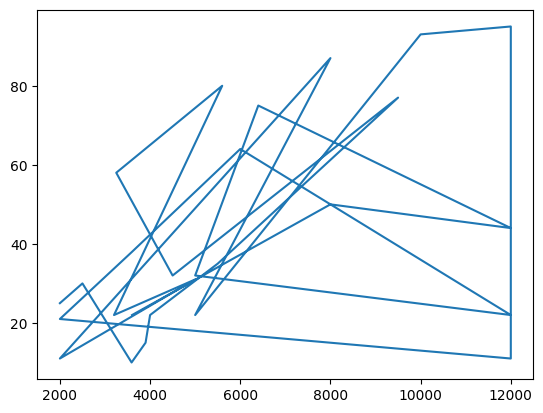

In [11]:
x=data['total_price']
y=data['itemsales_quantity']
plt.plot(x,y)

In [12]:
from sklearn.linear_model import LinearRegression
model_lin=LinearRegression()

In [13]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [14]:
x1,x2,x3=data['date'],data['itemsales_quantity'],data['total_price']
x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)
x1,x2,x3=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[['2023-07-01' 25 2000]
 ['2023-07-02' 30 2500]
 ['2023-07-03' 10 3590]
 ['2023-07-04' 15 3900]
 ['2023-07-05' 22 4000]
 ['2023-08-04' 35 5500]
 ['2023-08-05' 77 9500]
 ['2023-08-06' 32 4500]
 ['2023-08-08' 58 3250]
 ['2023-08-09' 80 5600]
 ['2023-08-10' 22 3200]
 ['2023-08-11' 31 5000]
 ['2023-08-12' 11 2000]
 ['2023-08-13' 87 8000]
 ['2023-08-14' 22 5000]
 ['2023-08-15' 93 10000]
 ['2023-08-16' 95 12000]
 ['2023-08-17' 11 12000]
 ['2023-08-18' 21 2000]
 ['2023-08-19' 38 3600]
 ['2023-08-20' 64 6000]
 ['2023-08-21' 22 12000]
 ['2023-08-22' 32 5000]
 ['2023-08-23' 75 6400]
 ['2023-08-24' 44 12000]
 ['2023-08-25' 50 8000]
 ['2023-08-26' 22 3600]]


In [15]:
x_train,x_test,y_train,y_test=final_x[:-5],final_x[-5:],final_y[:-5],final_y[-5:]

NameError: name 'final_y' is not defined